<a href="https://colab.research.google.com/github/PaulaBergamasco/EnfermedadCardiaca/blob/main/Proyecto_final_(segunda_entrega)_Bergamasco_Paula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importación de librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE

sns.set_theme(style='whitegrid', font='sans-serif', font_scale=1, color_codes=True, rc={"grid.color": "0.95", "axes.labelsize": 12, "xtick.labelsize": 10, "ytick.labelsize": 10})

In [ ]:
#conección con google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#TABLA DE CONTENIDO

1. INTRODUCCIÓN
2. DATASET ENFERMEDAD CARDIACA

     2.1 CONTEXTO EMPRESARIAL

     2.2 PROBLEMA COMERCIAL

     2.3 CONTEXTO ANALÍTICO

     2.4 VARIABLES

     2.5 DATASET

3. DATA WRANGLING
4. VISUALIZACIONES

     4.1 VARIABLES NUMÉRICAS

     4.2 VARIABLES CATEGÓRICAS

5. CODIFICACION DE LAS VARIABLES

6. GENERACION DE NUEVAS VARIABLES

7. SELECCION DE VARIABLES

8. ELECCION DE MODELOS DE CLASIFICACION

     8.1 DEFINICION DE X E Y

     8.2 BALANCEO DEL DATASET

     8.3 DEFINICION DE TRAIN Y TEST

     8.4 MODELO RANDOM FOREST

     8.5 MODELO REGRESION LOGISTICA

     8.6 MODELO KNN

9. EVALUACION DE MODELOS

     9.1 MODELO RANDOM FOREST
     
     9.2 MODELO REGRESION LOGISTICA

     9.3 MODELO KNN

10. CONCLUSION
  

  


#1. INTRODUCCIÓN

Las enfermedades cardiovasculares constituyen una de las principales causas de morbilidad y mortalidad a nivel mundial, representando un desafío significativo para la salud pública. La detección temprana de enfermedades cardíacas es crucial para implementar intervenciones preventivas y proporcionar un tratamiento oportuno, lo que puede mejorar significativamente los resultados clínicos. En este contexto, la ciencia de datos emerge como una herramienta poderosa para analizar y extraer patrones a partir de conjuntos de datos, ofreciendo nuevas perspectivas y oportunidades para abordar este importante problema de salud.

Este proyecto se centra en la detección de enfermedades cardíacas mediante el análisis de datos recopilados a través de encuestas detalladas. La relevancia de este estudio radica en la capacidad de la ciencia de datos para identificar factores de riesgo, patrones y correlaciones que pueden no ser evidentes mediante métodos tradicionales. La información derivada de estas encuestas, combinada con técnicas avanzadas de minería de datos y aprendizaje automático, tiene el potencial de mejorar la precisión en la identificación de individuos en riesgo de enfermedad cardíaca.

El impacto social y económico de las enfermedades cardiovasculares subraya la importancia crítica de desarrollar enfoques innovadores para su detección y prevención. A través de este proyecto, se busca no solo entender la relación entre diversos factores de riesgo y la enfermedad cardíaca, sino también proporcionar un marco analítico que pueda ser implementado en la práctica clínica para mejorar la toma de decisiones y la asignación de recursos de manera más efectiva.

Al abrazar las herramientas de la ciencia de datos, este proyecto no solo aspira a ampliar nuestro conocimiento sobre las enfermedades cardíacas, sino también a contribuir significativamente a la evolución de métodos de detección temprana, allanando el camino hacia un futuro más saludable y resistente ante este importante desafío de salud pública.

#2. DATASET ENFERMEDAD CARDIACA

###2.1 CONTEXTO EMPRESARIAL

La enfermedad cardíaca incluye una gran variedad de afecciones que afectan al corazón. Las enfermedades cardíacas son una de las principales causas de muerte en el mundo. Cada año mueren más personas por enfermedades cardiovasculares (ECV) que por cualquier otra causa.
Los factores de riesgo claves de enfermedad cardíaca son: presión arterial alta, colesterol alto, tabaquismo, diabetes, obesidad (IMC alto), no realizar suficiente actividad física, beber demasiado alcohol, edad, sexo, antecedentes familiares y estrés.
Detectar y prevenir los factores que más inciden en las enfermedades del corazón es muy importante en el ámbito sanitario.
El objetivo del proyecto es investigar si es factible predecir la enfermedad cardíaca en individuos a partir de una encuesta telefónica.

###2.2 PROBLEMA COMERCIAL


Podría a partir del conjunto de datos predecirse la enfermedad cardíaca en pacientes en función de su historial médico? Esto puede ser útil para los profesionales de la salud en la identificación de pacientes que pueden estar en riesgo de desarrollar alguna enfermedad cardíaca y en el desarrollo de planes de tratamiento personalizados. Además, se puede explorar las relaciones entre varios factores médicos y la probabilidad de desarrollar otras enfermedades.

###2.3 CONTEXTO ANALÍTICO




El conjunto de datos proviene de los CDC (Centros para el Control y la Prevención de Enfermedades) y es una parte importante del Sistema de Vigilancia de Factores de Riesgo del Comportamiento (BRFSS), que realiza encuestas telefónicas anuales para recopilar datos sobre el estado de salud de los residentes de EE. UU. El conjunto de datos incluye datos del 2020, y consta de 319795 filas y 279 columnas, pero para este proyecto se redujo a 18 variables. La gran mayoría de las columnas son preguntas que se hacen a los encuestados sobre su estado de salud. En este conjunto de datos, se incluyeron diferentes factores que directa o indirectamente influyen en la enfermedad cardíaca. Se debe tratar la variable "Enfermedad cardíaca" como binaria ("Sí", el encuestado tenía una enfermedad cardíaca; "No": el encuestado no tenía ninguna enfermedad cardíaca).

####FUENTE: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

###2.4 VARIABLES

El dataset está conformado por 18 variables, la variable objetivo 'EnfermedadCardiaca', la cual es una variable categórica que indica si el individuo presenta o no alguna enfermedad cardiaca, 13 variables categóricas, que indican si el individuo presenta o no determinada condición, o describen alguna característica del mismo, las cuales son, 'Fumar', 'ConsumoAlcohol', 'AccidenteCerebroVascular', 'DificultadCaminar', 'Sexo', 'Edad'(categórica ya que la edad se encuentra diferenciada por rangos etarios), 'Raza', 'Diabetes', 'ActividadFísica', 'SaludGeneral', 'Asma', 'EnfermedadRenal', 'CancerDePiel', y 4 variables numéricas, 'IMC', 'SaludFisica', 'SaludMental' y 'HorasSueño'. A continuación se describen en detalle cada una de ellas:

1. EnfermedadCardiaca: Encuestados que han reportado alguna vez haber tenido enfermedad coronaria o infarto de miocardio. Variable objetivo.
2. IMC: Índice de Masa Corporal.
3. Fumar: ¿Has fumado al menos 100 cigarrillos en toda tu vida?
4. ConsumoAlcohol: Bebedores frecuentes (hombres adultos que toman más de 14 bebidas por semana y mujeres adultas que toman más de 7 bebidas por semana).
5. AccidenteCerebroVascular: ¿Alguna vez te han dicho que tuviste un accidente cerebrovascular?
6. SaludFisica: Pensando en tu salud física, que incluye enfermedades y lesiones físicas, ¿durante cuántos días de los últimos 30 días tu salud física fue mala?
7. SaludMental: Pensando en tu salud mental, ¿durante cuántos días de los últimos 30 días tu salud mental no fue buena?
8. DificultadCaminar: ¿Tienes dificultades graves para caminar o subir escaleras?
9. Sexo: ¿Eres hombre o mujer?
10. Edad: Categoría de edad de catorce niveles.
11. Raza: Raza/etnicidad.
12. Diabetes: ¿Alguna vez te han dicho que tienes diabetes?
13. ActividadFísica: Adultos que informaron haber realizado actividad física o ejercicio en los últimos 30 días que no fuera parte de su trabajo habitual.
14. SaludGeneral: Estado de salud general.
15. HorasSueño: En promedio, ¿cuántas horas de sueño obtienes en un período de 24 horas?
16. Asma: ¿Alguna vez te han dicho que tienes asma?
17. EnfermedadRenal: Sin incluir piedras en los riñones, infección de la vejiga o incontinencia, ¿alguna vez te han dicho que tienes enfermedad renal?
18. CancerDePiel: ¿Alguna vez te han dicho que tienes cáncer de piel?

###2.5 DATASET

In [ ]:
#carga del dataset
df= pd.read_csv('/content/drive/MyDrive/CODERHOUSE/Data Scientist/Datasets/Enfermedad cardiaca.csv')

In [ ]:
#definición de los nombres de las columnas
nombre_columnas= ["EnfermedadCardiaca", "IMC", "Fumar", "ConsumoAlcohol", "AccidenteCerebroVascular", "SaludFisica", "SaludMental", "DificultadCaminar", "Sexo", "Edad", "Raza", "Diabetes", "ActividadFisica", "SaludGeneral", "HorasSueño", "Asma", "EnfermedadRenal", "CancerDePiel"]

In [ ]:
#renombre de los nombres de las columnas
df.columns = nombre_columnas

In [ ]:
df.head()

,EnfermedadCardiaca,IMC,Fumar,ConsumoAlcohol,AccidenteCerebroVascular,SaludFisica,SaludMental,DificultadCaminar,Sexo,Edad,Raza,Diabetes,ActividadFisica,SaludGeneral,HorasSueño,Asma,EnfermedadRenal,CancerDePiel
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.shape

(319795, 18)

In [ ]:
df.columns

Index(['EnfermedadCardiaca', 'IMC', 'Fumar', 'ConsumoAlcohol',
       'AccidenteCerebroVascular', 'SaludFisica', 'SaludMental',
       'DificultadCaminar', 'Sexo', 'Edad', 'Raza', 'Diabetes',
       'ActividadFisica', 'SaludGeneral', 'HorasSueño', 'Asma',
       'EnfermedadRenal', 'CancerDePiel'],
      dtype='object')

#3. DATA WRANGLING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   EnfermedadCardiaca        319795 non-null  object 
 1   IMC                       319795 non-null  float64
 2   Fumar                     319795 non-null  object 
 3   ConsumoAlcohol            319795 non-null  object 
 4   AccidenteCerebroVascular  319795 non-null  object 
 5   SaludFisica               319795 non-null  float64
 6   SaludMental               319795 non-null  float64
 7   DificultadCaminar         319795 non-null  object 
 8   Sexo                      319795 non-null  object 
 9   Edad                      319795 non-null  object 
 10  Raza                      319795 non-null  object 
 11  Diabetes                  319795 non-null  object 
 12  ActividadFisica           319795 non-null  object 
 13  SaludGeneral              319795 non-null  o

Se puede observar que ninguna de las variables del dataset presenta valores nulos.



In [ ]:
df.duplicated().sum()

18078

Se puede observar la presencia de 18,078 registros duplicados. Se ha optado por eliminar dichos registros, ya que esta duplicación podría ser resultado de respuestas repetidas cargadas por error, y no representan una gran cantidad respecto al total de registros.

In [ ]:
df.drop_duplicates(inplace= True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(301717, 18)

In [ ]:
df.describe()

,IMC,SaludFisica,SaludMental,HorasSueño
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [ ]:
conteo_salud_mental = df[df['SaludMental'] > 0].shape[0]
print('Cantidad de valores de Salud Mental mayores que 0:', conteo_salud_mental)
conteo_salud_fisica = df[df['SaludFisica'] > 0].shape[0]
print('Cantidad de valores de Salud Física mayores que 0:', conteo_salud_fisica)

Cantidad de valores de Salud Mental mayores que 0: 113819
Cantidad de valores de Salud Física mayores que 0: 93106


Con respecto a las variables cuantitativas podemos ver que las variables salud física y salud mental la gran mayoría de los datos son igual a 0, es decir que tenemos escasos valores positivos, solo un 25% aproximadamente del total de los casos, esto no quiere decir que sean datos erroneos, solo que la mayoría de los individuos encuestados presentan un buen estado de salud tanto fisica como mental. Ahora para el caso de IMC y HorasSueño podemos ver que existen valores muy extremos que podrían tratarse de outliers.

In [ ]:
variables_categoricas=['EnfermedadCardiaca', 'Fumar', 'ConsumoAlcohol','AccidenteCerebroVascular', 'DificultadCaminar', 'Sexo', 'Edad', 'Raza', 'Diabetes','ActividadFisica', 'SaludGeneral', 'Asma','EnfermedadRenal', 'CancerDePiel']

In [ ]:
variables_numericas= ['IMC',	'SaludFisica', 'SaludMental', 'HorasSueño', 'EnfermedadCardiaca']

In [ ]:
for x in variables_categoricas:
 print(x, df[x].unique())
 print(df[x].value_counts())
 print('------------------------------------------------------------------')

EnfermedadCardiaca ['No' 'Yes']
No     274456
Yes     27261
Name: EnfermedadCardiaca, dtype: int64
------------------------------------------------------------------
Fumar ['Yes' 'No']
No     174312
Yes    127405
Name: Fumar, dtype: int64
------------------------------------------------------------------
ConsumoAlcohol ['No' 'Yes']
No     280136
Yes     21581
Name: ConsumoAlcohol, dtype: int64
------------------------------------------------------------------
AccidenteCerebroVascular ['No' 'Yes']
No     289653
Yes     12064
Name: AccidenteCerebroVascular, dtype: int64
------------------------------------------------------------------
DificultadCaminar ['No' 'Yes']
No     257362
Yes     44355
Name: DificultadCaminar, dtype: int64
------------------------------------------------------------------
Sexo ['Female' 'Male']
Female    159671
Male      142046
Name: Sexo, dtype: int64
------------------------------------------------------------------
Edad ['55-59' '80 or older' '65-69' '75-79' '

Como vimos anteriorrmente con las variables númericas se puede ver que hay un desbalance para la mayoría de las variables, y esto puede deberse como se mencionó anteriormente que la mayoría de los encuestados son personas aparentemente sanas.

#4. VISUALIZACIONES

A continuación se realizan distintas visualizaciones para demostrar como es el comportamiento de las distintas variables respecto a la variable objetivo.

###4.1 VARIABLES NUMÉRICAS

Existe alguna diferencia entre el comportamiento de las diferentes variables numéricas respecto de los pacientes con enfermedad cardiaca y sin enfermedad cardiaca?

En primer lugar evaluaremos el comportamiento del **IMC** y las **Horas de sueño**.

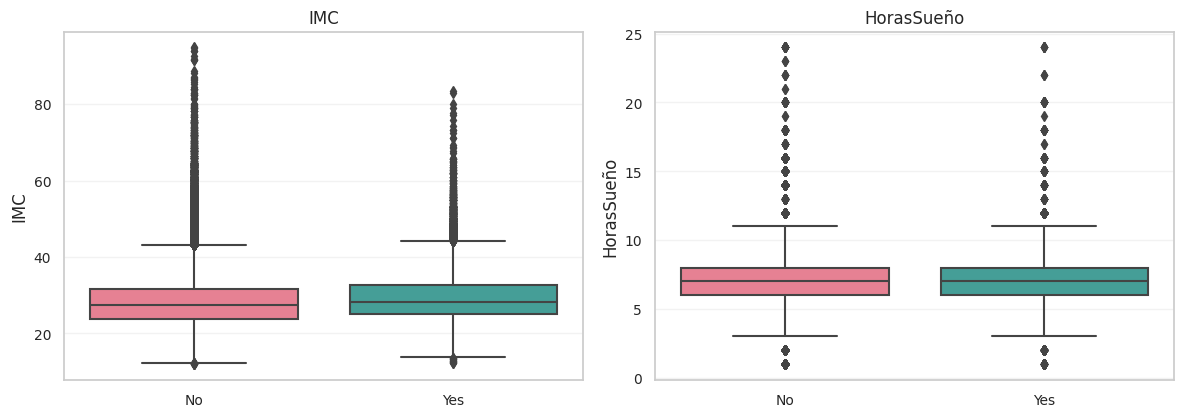

In [ ]:
#se grafican las variables IMC y HorasSueño para evaluar su comportamiento respecto a la variable EnfermedadCardiaca
plt.figure(figsize=(12, 8))

selected_columns = [variables_numericas[0], variables_numericas[3]]

for i, j in enumerate(selected_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='EnfermedadCardiaca', y=j, data=df, showfliers=True, palette='husl')
    plt.title(j)
    plt.xlabel('')

plt.tight_layout()

En este caso se puede observar que si bien no pareciera existir una relación con la variable HorasSueño si lo hay con la variable IMC, donde se observan valores mayores para aquellas personas que presentan enfermedad cardiaca. A continuación analizaremos el comportamiento de la variable IMC en más detalle. Pero antes se trataran los outliers, ya que, como se vio anteriormente y como se demuestra en el gráfico ambas variables presentan valores atípicos.




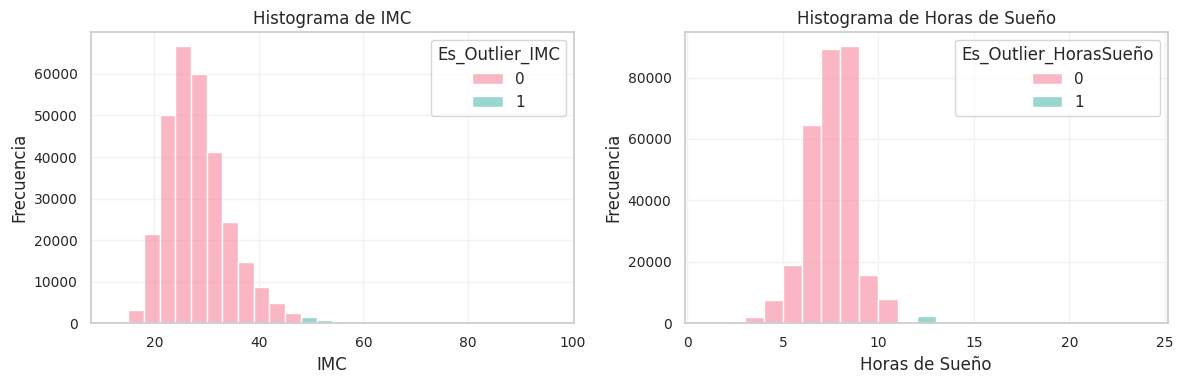

In [ ]:
df_outliers= df.copy()

# Identificación de outliers usando el método Z-Score
z_scores_imc = np.abs(stats.zscore(df_outliers['IMC']))
umbral_imc = 3 # Se define como umbral 3 desviaciones estándar
outliers_indice_imc = np.where(z_scores_imc > umbral_imc)

z_scores_hs = np.abs(stats.zscore(df_outliers['HorasSueño']))
umbral_hs = 3 # Se define como umbral 3 desviaciones estándar
outliers_indices_hs = np.where(z_scores_hs > umbral_hs)

# Crear un DataFrame con columnas de indicadores para outliers
df_outliers['Es_Outlier_IMC'] = 0
df_outliers['Es_Outlier_HorasSueño'] = 0
df_outliers.loc[outliers_indice_imc[0], 'Es_Outlier_IMC'] = 1
df_outliers.loc[outliers_indices_hs[0], 'Es_Outlier_HorasSueño'] = 1

plt.figure(figsize=(12, 4))

# Subtrama 1: Histograma de IMC con marcadores para outliers
plt.subplot(1, 2, 1)
sns.histplot(data=df_outliers, x='IMC', hue='Es_Outlier_IMC',  palette='husl', binwidth=3)
plt.title('Histograma de IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')

# Subtrama 2: Histograma de Horas de Sueño con marcadores para outliers
plt.subplot(1, 2, 2)
sns.histplot(data=df_outliers, x='HorasSueño', hue='Es_Outlier_HorasSueño',  palette='husl', binwidth=1)
plt.title('Histograma de Horas de Sueño')
plt.xlabel('Horas de Sueño')
plt.ylabel('Frecuencia')

# Ajustar el diseño de las subtramas
plt.tight_layout()

In [ ]:
# Contar valores atípicos para la variable 'IMC'
outliers_imc = len(outliers_indice_imc[0])

# Contar valores atípicos para la variable 'HorasSueño'
outliers_horas_sueño = len(outliers_indices_hs[0])

print(f"Valores atípicos en IMC: {outliers_imc}")
print(f"Valores atípicos en HorasSueño: {outliers_horas_sueño}")

Valores atípicos en IMC: 3722
Valores atípicos en HorasSueño: 4542


In [ ]:
df_outliers.head()

,EnfermedadCardiaca,IMC,Fumar,ConsumoAlcohol,AccidenteCerebroVascular,SaludFisica,SaludMental,DificultadCaminar,Sexo,Edad,Raza,Diabetes,ActividadFisica,SaludGeneral,HorasSueño,Asma,EnfermedadRenal,CancerDePiel,Es_Outlier_IMC,Es_Outlier_HorasSueño
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0,0
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,0,0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,0,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,0,0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,0,0


In [ ]:
# Genera valores aleatorios para 'IMC' y 'HorasSueño' basados en la media y la desviación estándar
random_values_imc = np.random.normal(loc=df_outliers['IMC'].mean(),
                                     scale=df_outliers['IMC'].std(),
                                     size=len(outliers_indice_imc[0]))

random_values_hs = np.random.normal(loc=df_outliers['HorasSueño'].mean(),
                                    scale=df_outliers['HorasSueño'].std(),
                                    size=len(outliers_indices_hs[0]))

# Reemplaza outliers con los valores aleatorios basados en la media y la desviación estándar
df_outliers.loc[z_scores_imc > umbral_imc, 'IMC'] = random_values_imc
df_outliers.loc[z_scores_hs > umbral_hs, 'HorasSueño'] = random_values_hs

In [ ]:
df_outliers.shape

(301717, 20)

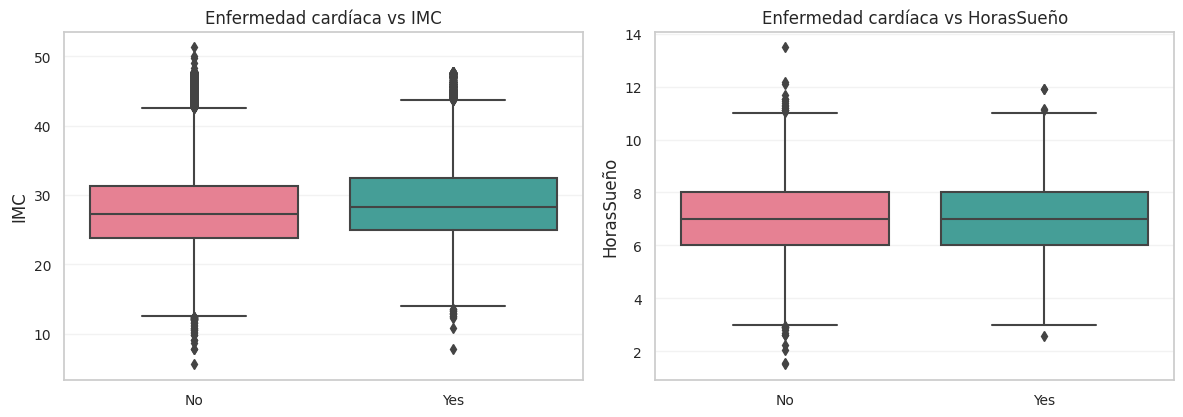

In [ ]:
plt.figure(figsize=(12, 8))

selected_columns = [variables_numericas[0], variables_numericas[3]]

for i, j in enumerate(selected_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='EnfermedadCardiaca', y=j, data=df_outliers, showfliers=True, palette='husl')
    plt.title(f"Enfermedad cardíaca vs {j}")
    plt.xlabel('')

plt.tight_layout()

Se utiliza como estrategia para identificar los outliers a aquellos que superen en 3 veces la desviación estandar (tanto para valores inferiores como para valores superiores) y se los reemplaza por valores aleatorios basados en la media y la desviación estándar.

In [ ]:
#se crea un dataframe que incluye solo aquellas personas de sexo masculino
df_m=df_outliers[df_outliers['Sexo'] == 'Male']

In [ ]:
#se crea un dataframe que incluye solo aquellas personas de sexo femenino
df_f=df_outliers[df_outliers['Sexo'] == 'Female']

In [ ]:
#se calcula la media del IMC para hombres y mujeres
mean_imc_m = df_m['IMC'].mean()
mean_imc_f = df_f['IMC'].mean()

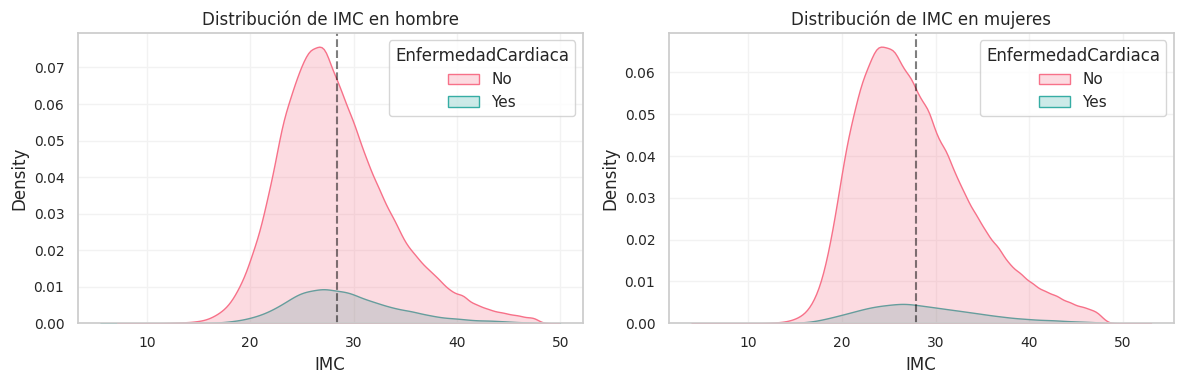

In [ ]:
#disfribución del IMC diferenciado por sexo en relación a la presencia o no de enfermedad cardíaca
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.kdeplot(data=df_m, x= 'IMC', hue='EnfermedadCardiaca', fill=True, palette= 'husl', ax=ax[0])
ax[0].set_title("Distribución de IMC en hombre")
ax[0].axvline(mean_imc_m, color='black', linestyle='--', label='Media', alpha=0.5)

sns.kdeplot(data=df_f, x= 'IMC', hue='EnfermedadCardiaca', fill=True, palette= 'husl', ax=ax[1])
ax[1].set_title("Distribución de IMC en mujeres")
ax[1].axvline(mean_imc_f, color='black', linestyle='--', label='Media', alpha=0.5)

plt.tight_layout()


Se puede observar que en ambos casos, en hombres como en mujeres, el IMC en personas sin enfermedad cardíaca esta por debajo de la media.

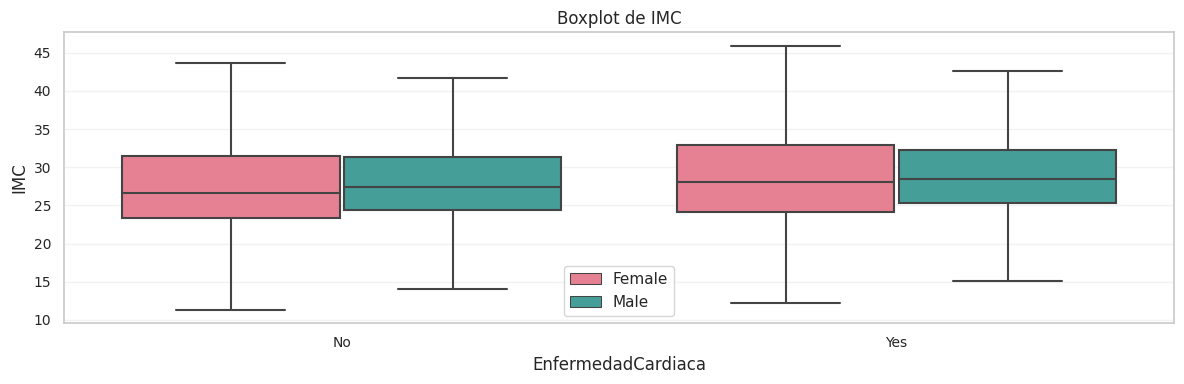

In [ ]:
#se grafica boxplot de IMC para evaluar su distribución diferenciado por sexo y por enfermedad cardiaca
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(x='EnfermedadCardiaca', y='IMC', data=df_outliers, showfliers=False, palette='husl', hue='Sexo', ax=ax)
ax.set_title("Boxplot de IMC")
ax.legend()

plt.tight_layout()

Si comparamos el IMC entre hombres y mujeres se puede observar que la mediana del IMC en hombres es levemente superior al de las mujeres en ambos casos, con y sin enfermedad cardíaca.

Que ocurre en el caso de las variables **salud física** y **salud mental**?


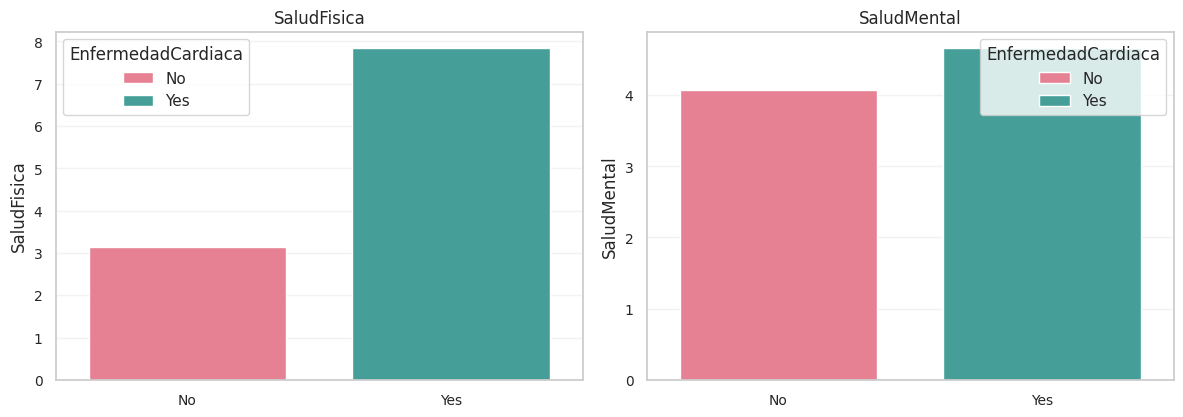

In [ ]:
#se grafica boxplot de salud física y salud mental para evaluar su comportamiento diferenciado por enfermedad cardiaca
plt.figure(figsize=(12, 8))

selected_columns = [variables_numericas[1], variables_numericas[2]]

for i, j in enumerate(selected_columns):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x='EnfermedadCardiaca', y=j, data=df_outliers, hue='EnfermedadCardiaca', palette='husl', errorbar=None, dodge=False, width=0.75)
    plt.title(j)
    plt.xlabel('')

plt.tight_layout()

En este escenario, se evidencia que, aunque parece haber una conexión ligera entre la variable "SaludMental" y la presencia de enfermedad cardíaca, dicha relación es más pronunciada con la variable "SaludFisica". Se observan valores más elevados en las personas que tienen enfermedad cardíaca en comparación con aquellas que no la tienen. Este patrón resulta coherente, ya que la presencia de una enfermedad cardíaca podría estar asociada a una sensación física menos favorable.



In [ ]:
#se evalua el promedio de la salud física en relación a enfermedad cardiaca
df_saludfisica = df.groupby(by='EnfermedadCardiaca')['SaludFisica'].mean().round(1)
df_saludfisica = df_saludfisica.reset_index()
df_saludfisica.columns = ['EnfermedadCardiaca', 'SaludFisicaPromedio']
print(df_saludfisica)

  EnfermedadCardiaca  SaludFisicaPromedio
0                 No                  3.1
1                Yes                  7.8


In [ ]:
#se evalua el promedio de la salud mental en relación a enfermedad cardiaca
df_saludmental = df.groupby(by='EnfermedadCardiaca')['SaludMental'].mean().round(1)
df_saludmental = df_saludmental.reset_index()
df_saludmental.columns = ['EnfermedadCardiaca', 'SaludMentalPromedio']
print(df_saludmental)

  EnfermedadCardiaca  SaludMentalPromedio
0                 No                  4.1
1                Yes                  4.7


Aquí podemos ver como el promedio de salud física en enfermos cardíacos es significativamente mayor que en personas sin enfermedad cardíaca, a diferencia de enfermedad mental donde la diferencia no es tan marcada.

Text(0.5, 1.0, 'Relación entre SaludFisica e IMC para Enfermedad Cardiaca')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



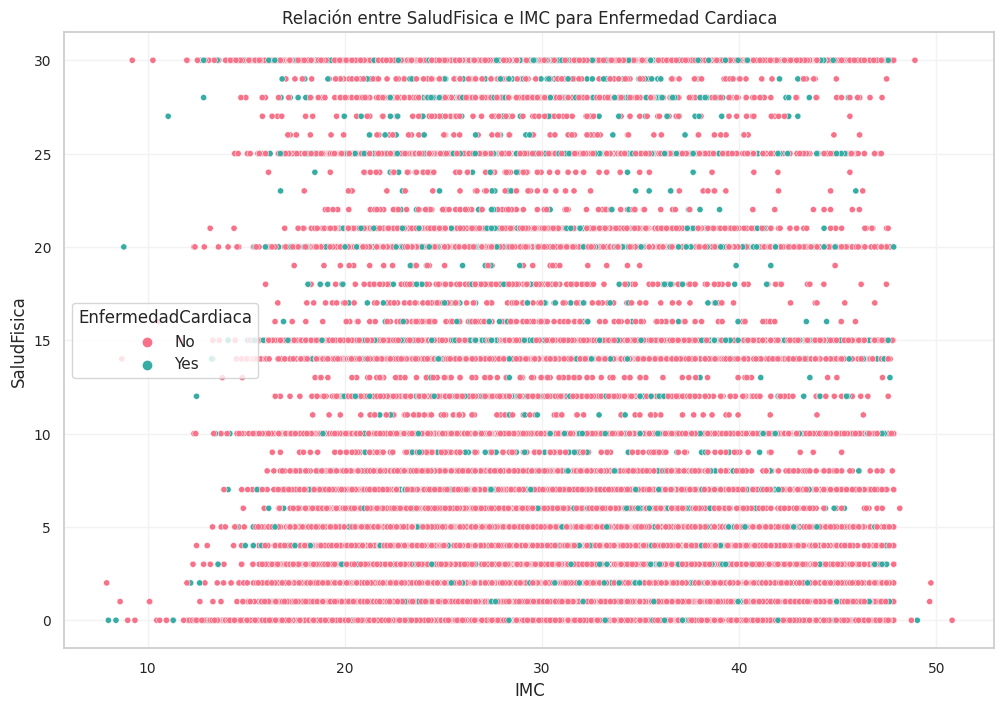

In [ ]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df_outliers, y='SaludFisica', x='IMC', palette= 'husl', hue= 'EnfermedadCardiaca', s=20)
plt.title('Relación entre SaludFisica e IMC para Enfermedad Cardiaca')

Al evaluar las dos variables numéricas que parecieran tener una relación con la variable EnfermedadCardiaca se puede ver que no existe una correlación entre ellas.

###4.2 VARIABLES CATEGÓRICAS

Existe alguna diferencia entre el comportamiento de las diferentes variables categóricas respecto de los pacientes con enfermedad cardiaca y sin enfermedad cardiaca?

Existe una predisposición a manifestar una enfermedad cardiaca de acuerdo al **sexo**?

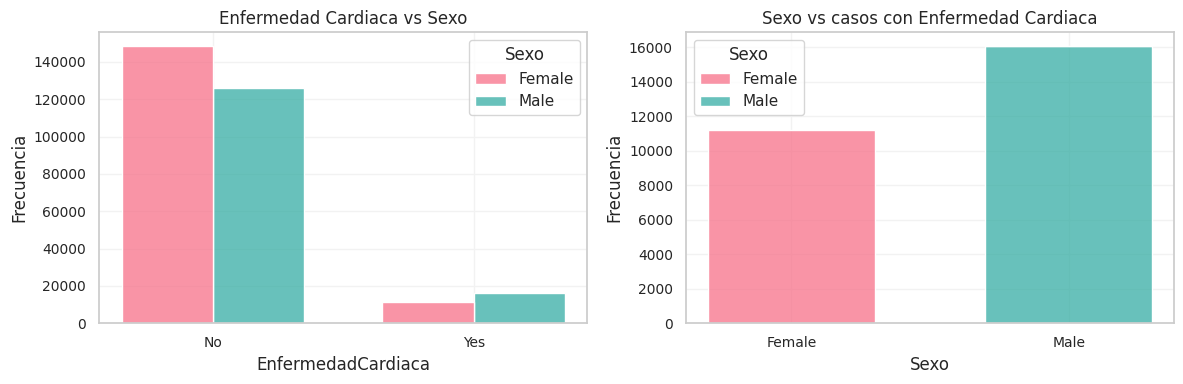

In [ ]:
#gráfico de barras relacionando la presencia o no de enfermedad cardíaca en relación al sexo
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.histplot(data=df_outliers, x="EnfermedadCardiaca", hue="Sexo", multiple="dodge", shrink= 0.7, palette="husl", ax=ax[0])
ax[0].set_title("Enfermedad Cardiaca vs Sexo")
ax[0].set_ylabel("Frecuencia")
sns.histplot(data=df_outliers[df_outliers['EnfermedadCardiaca'].eq('Yes')], multiple='stack', x="Sexo", shrink= 0.6, palette="husl", ax=ax[1], hue='Sexo')
ax[1].set_title("Sexo vs casos con Enfermedad Cardiaca")
ax[1].set_ylabel("Frecuencia")
plt.tight_layout()

In [ ]:
df_outliers['Sexo'].value_counts()

Female    159671
Male      142046
Name: Sexo, dtype: int64

In [ ]:
df_outliers['EnfermedadCardiaca'].value_counts()

No     274456
Yes     27261
Name: EnfermedadCardiaca, dtype: int64

In [ ]:
#cálculo del porcentaje de personas que presentan enfermedad cardíaca respecto del total de personas encuestadas
enf_car= df_outliers['EnfermedadCardiaca'][df_outliers['EnfermedadCardiaca'] == 'Yes'].count()
no_enf_car= df_outliers['EnfermedadCardiaca'][df_outliers['EnfermedadCardiaca'] == 'No'].count()

porcentaje_enf_car= enf_car * 100 / (enf_car + no_enf_car)
porcentaje_enf_car

9.03528803481408

Se observa que, del total de encuestados, existe una proporción bastante equitativa entre hombres y mujeres y que solo un pequeño porcentaje (9.035%) muestra alguna enfermedad cardíaca, y de ellos, se aprecia una mayor frecuencia de casos en hombres en comparación con mujeres.

Y existe una relación hay con la **edad**?

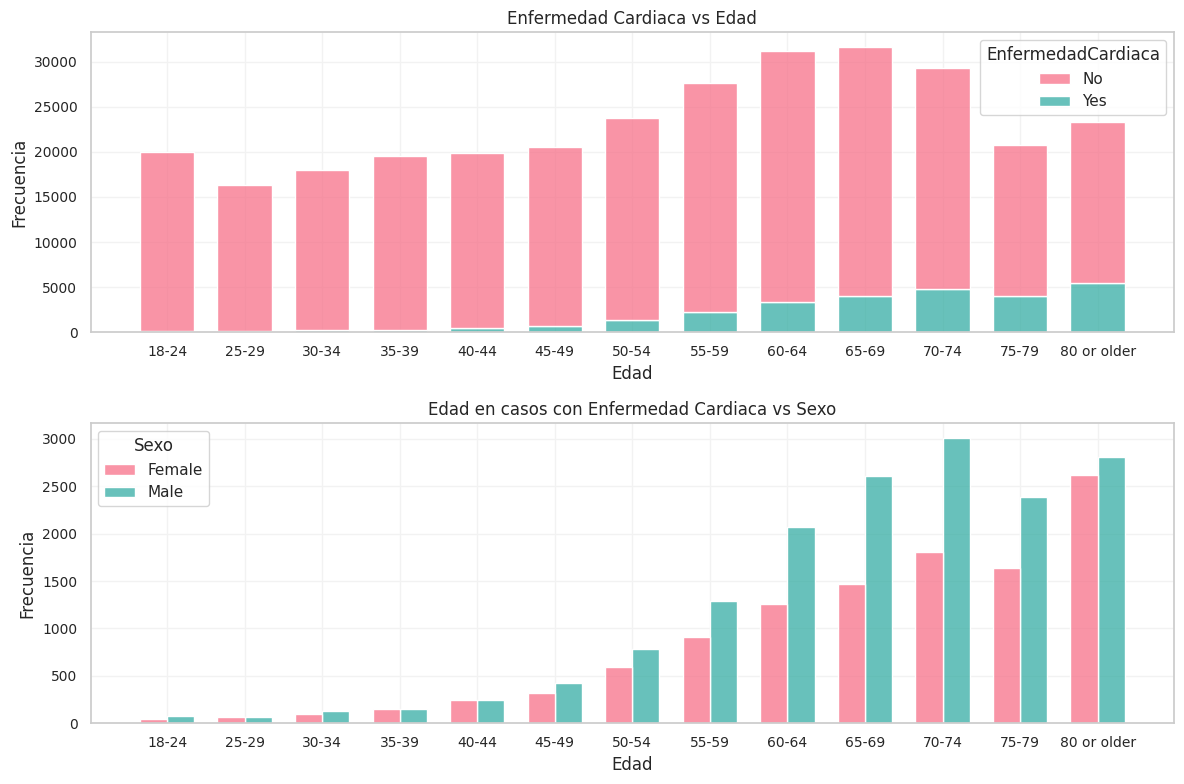

In [ ]:
#gráfico de barras relacionando la presencia o no de enfermedad cardíaca en relación a la edad
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
sns.histplot(data=df_outliers.sort_values(by='Edad'), x='Edad', hue="EnfermedadCardiaca", multiple="stack", shrink= 0.7, palette="husl", ax=ax[0])
ax[0].set_title("Enfermedad Cardiaca vs Edad")
ax[0].set_ylabel("Frecuencia")
sns.histplot(data=df_outliers.sort_values(by='Edad').loc[df['EnfermedadCardiaca'] == 'Yes'], x='Edad', hue='Sexo', multiple="dodge", shrink= 0.7, palette="husl", ax=ax[1])
ax[1].set_title("Edad en casos con Enfermedad Cardiaca vs Sexo")
ax[1].set_ylabel("Frecuencia")
plt.tight_layout()

Aunque se nota un ligero aumento en la edad de los encuestados a medida que se avanza en las categorías de edad, es evidente que la incidencia de enfermedad cardíaca experimenta un incremento significativo con el envejecimiento, particularmente a partir de los 40 años. Además, se observa que la predominancia en la frecuencia de casos en hombres persiste incluso con el aumento de la edad.

Existen ciertos factores de riesgo externos que predisponen a la enfermedad cardíaca, como fumar, consumir alcohol y falta de actividad física. A continuación se evaluará la relación que existen entre ellos y la enfermedad cardiaca en nuestro dataset.


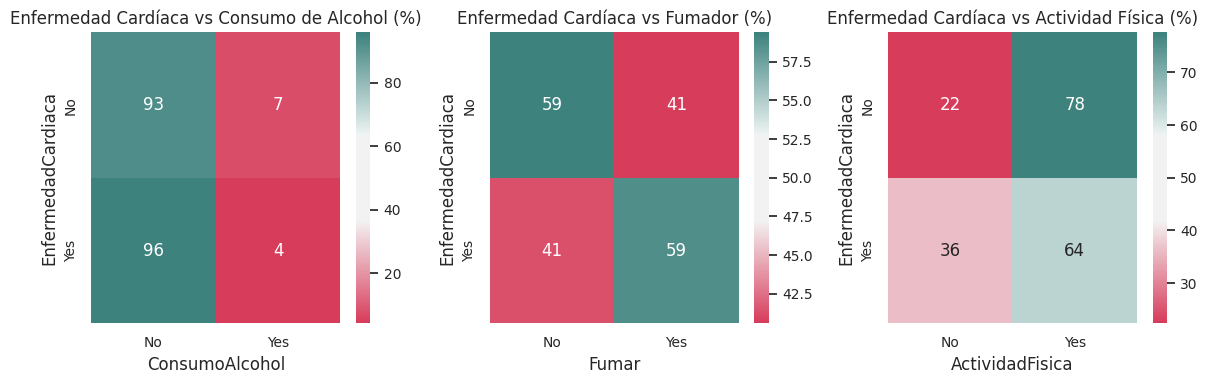

In [ ]:
#relación de enfermedad cardíaca con factores de riesgo

#tablas de contingencia
tabla_contingencia_alcohol = pd.crosstab(df_outliers['EnfermedadCardiaca'], df_outliers['ConsumoAlcohol'])
tabla_contingencia_alcohol_porcentaje = tabla_contingencia_alcohol.div(tabla_contingencia_alcohol.sum(axis=1), axis=0) * 100
tabla_contingencia_fumar = pd.crosstab(df_outliers['EnfermedadCardiaca'], df_outliers['Fumar'])
tabla_contingencia_fumar_porcentaje = tabla_contingencia_fumar.div(tabla_contingencia_fumar.sum(axis=1), axis=0) * 100
tabla_contingencia_af= pd.crosstab(df_outliers['EnfermedadCardiaca'], df_outliers['ActividadFisica'])
tabla_contingencia_af_porcentaje = tabla_contingencia_af.div(tabla_contingencia_af.sum(axis=1), axis=0) * 100

#heatmap
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
cmap = sns.diverging_palette(5, 185, sep=77, as_cmap=True)
heatmap1 = sns.heatmap(tabla_contingencia_alcohol_porcentaje, cmap=cmap, annot=True, fmt='.0f', ax=ax[0])
heatmap2 = sns.heatmap(tabla_contingencia_fumar_porcentaje, cmap=cmap, annot=True, fmt='.0f', ax=ax[1])
heatmap3 = sns.heatmap(tabla_contingencia_af_porcentaje, cmap=cmap, annot=True, fmt='.0f', ax=ax[2])

heatmap1.set_title('Enfermedad Cardíaca vs Consumo de Alcohol (%)')
heatmap2.set_title('Enfermedad Cardíaca vs Fumador (%)')
heatmap3.set_title('Enfermedad Cardíaca vs Actividad Física (%)')

plt.tight_layout()



Se evidencia que, en nuestros datos, la presencia de enfermedad cardíaca tiene una baja asociación con el consumo de alcohol, ya que solo un 4% de las personas afectadas consumen esta sustancia. No obstante, al examinar en detalle, se observa que el consumo de alcohol es generalmente bajo en la población total. En contraste, la enfermedad cardíaca muestra una fuerte asociación con el consumo de cigarrillos, dado que cerca del 60% de las personas con enfermedad cardíaca son fumadoras, aunque también se observa un número significativo de personas sin enfermedad cardíaca que consumen tabaco. En cuanto a la actividad física, la relación no es tan pronunciada, pero se aprecia que un considerable porcentaje de personas con enfermedad cardíaca no realiza actividad física, mientras que la mayoría de las personas sin enfermedad cardíaca sí lo hacen.

Y que ocurre con la relación con otras enfermedades?

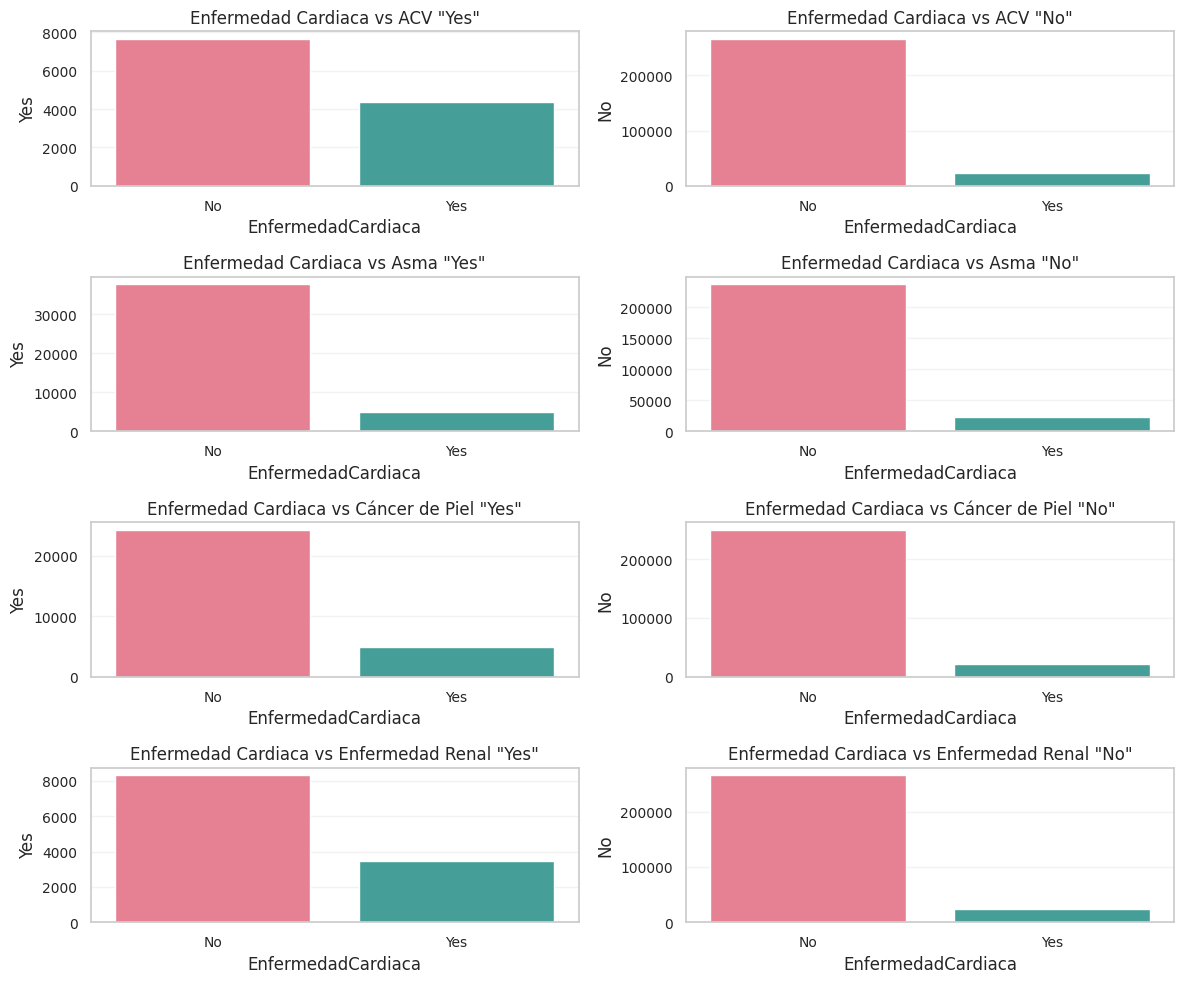

In [ ]:
# Tablas de contingencia
tabla_contingencia_acv = pd.crosstab(df_outliers['EnfermedadCardiaca'], df_outliers['AccidenteCerebroVascular'])
tabla_contingencia_as = pd.crosstab(df_outliers['EnfermedadCardiaca'], df_outliers['Asma'])
tabla_contingencia_cp = pd.crosstab(df_outliers['EnfermedadCardiaca'], df_outliers['CancerDePiel'])
tabla_contingencia_er = pd.crosstab(df_outliers['EnfermedadCardiaca'], df_outliers['EnfermedadRenal'])

# Configuración del gráfico de barras
fig, ax = plt.subplots(4, 2, figsize=(12, 10))

sns.barplot(x=tabla_contingencia_acv.index, y=tabla_contingencia_acv['Yes'], palette='husl', ax=ax[0, 0])
sns.barplot(x=tabla_contingencia_acv.index, y=tabla_contingencia_acv['No'], palette='husl', ax=ax[0, 1])
sns.barplot(x=tabla_contingencia_as.index, y=tabla_contingencia_as['Yes'], palette='husl', ax=ax[1, 0])
sns.barplot(x=tabla_contingencia_as.index, y=tabla_contingencia_as['No'], palette='husl', ax=ax[1, 1])
sns.barplot(x=tabla_contingencia_cp.index, y=tabla_contingencia_cp['Yes'], palette='husl', ax=ax[2, 0])
sns.barplot(x=tabla_contingencia_cp.index, y=tabla_contingencia_cp['No'], palette='husl', ax=ax[2, 1])
sns.barplot(x=tabla_contingencia_er.index, y=tabla_contingencia_er['Yes'], palette='husl', ax=ax[3, 0])
sns.barplot(x=tabla_contingencia_er.index, y=tabla_contingencia_er['No'], palette='husl', ax=ax[3, 1])

ax[0, 0].set_title('Enfermedad Cardiaca vs ACV "Yes"')
ax[0, 1].set_title('Enfermedad Cardiaca vs ACV "No"')
ax[1, 0].set_title('Enfermedad Cardiaca vs Asma "Yes"')
ax[1, 1].set_title('Enfermedad Cardiaca vs Asma "No"')
ax[2, 0].set_title('Enfermedad Cardiaca vs Cáncer de Piel "Yes"')
ax[2, 1].set_title('Enfermedad Cardiaca vs Cáncer de Piel "No"')
ax[3, 0].set_title('Enfermedad Cardiaca vs Enfermedad Renal "Yes"')
ax[3, 1].set_title('Enfermedad Cardiaca vs Enfermedad Renal "No"')

plt.tight_layout()


A partir de este gráfico, se observa que hay pocos casos positivos para las enfermedades estudiadas. Sin embargo, destaca que, en los casos de Enfermedad Renal y Accidente Cerebrovascular, la mayoría de las personas afectadas también presenta enfermedad cardíaca. Estos hallazgos sugieren una posible asociación entre estas enfermedades, indicando que la presencia de una enfermedad cardíaca podría estar relacionada con un mayor riesgo de desarrollar Enfermedad Renal o sufrir un Accidente Cerebrovascular o viceversa.

Se sabe que la **diabetes** esta asociada a la enfermedad cardiaca, que dicen nuestros datos?

In [ ]:
#se crean solo dos categorias de diabetes, Yes y No.
df_diabetes= df_outliers.copy()

In [ ]:
df_diabetes['Diabetes'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [ ]:
df_diabetes=df.replace(('No, borderline diabetes','Yes (during pregnancy)') ,('No', 'Yes'))

In [ ]:
df_diabetes['Diabetes'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df_diabetes['Diabetes'].value_counts()

No     258572
Yes     43145
Name: Diabetes, dtype: int64

In [ ]:
df_diabetes.head()

,EnfermedadCardiaca,IMC,Fumar,ConsumoAlcohol,AccidenteCerebroVascular,SaludFisica,SaludMental,DificultadCaminar,Sexo,Edad,Raza,Diabetes,ActividadFisica,SaludGeneral,HorasSueño,Asma,EnfermedadRenal,CancerDePiel
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


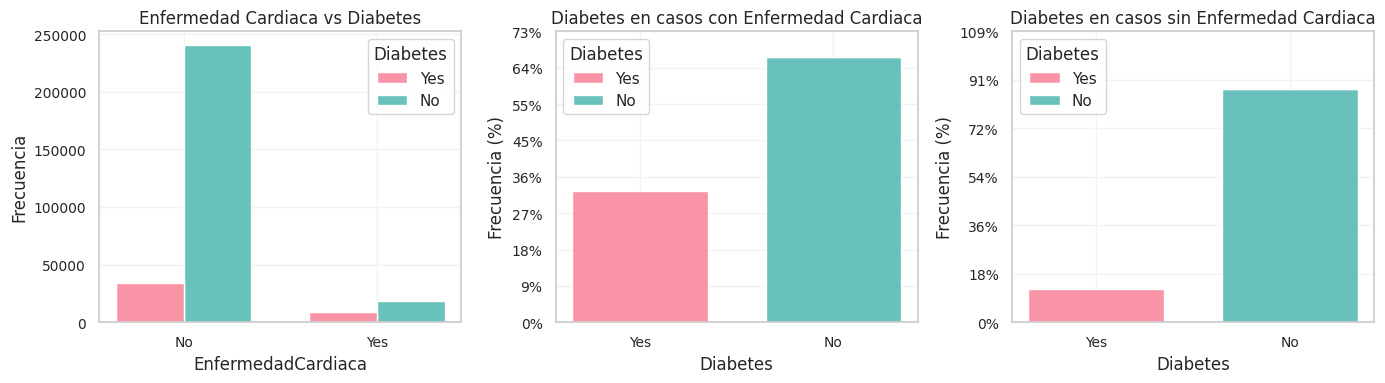

In [ ]:
#se grafica diabetes vs enfermedad cardiaca
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

sns.histplot(x='EnfermedadCardiaca', data=df_diabetes, hue='Diabetes', palette= 'husl', multiple="dodge", shrink= 0.7,  ax=ax[0])
ax[0].set_title("Enfermedad Cardiaca vs Diabetes")
ax[0].set_ylabel("Frecuencia")

sns.histplot(data=df_diabetes[df_diabetes['EnfermedadCardiaca'].eq('Yes')].sort_values(by= 'Diabetes', ascending=False), x="Diabetes", multiple='stack', shrink= 0.7, palette= 'husl', hue='Diabetes', ax=ax[1])
total_samples_1 = len(df_diabetes[df_diabetes['EnfermedadCardiaca'] == 'Yes'])
ax[1].set_yticks(ax[1].get_yticks())
ax[1].set_yticklabels([f'{int(tick / total_samples_1 * 100)}%' for tick in ax[1].get_yticks()])
ax[1].set_title("Diabetes en casos con Enfermedad Cardiaca")
ax[1].set_ylabel("Frecuencia (%)")
plt.tight_layout()

sns.histplot(data=df_diabetes[df_diabetes['EnfermedadCardiaca'].eq('No')].sort_values(by= 'Diabetes', ascending=False), x="Diabetes", multiple='stack', shrink= 0.7, palette= 'husl', hue='Diabetes', ax=ax[2])
total_samples_2 = len(df_diabetes[df_diabetes['EnfermedadCardiaca'] == 'No'])
ax[2].set_yticks(ax[2].get_yticks())
ax[2].set_yticklabels([f'{int(tick / total_samples_2 * 100)}%' for tick in ax[2].get_yticks()])
ax[2].set_title("Diabetes en casos sin Enfermedad Cardiaca")
ax[2].set_ylabel("Frecuencia (%)")
plt.tight_layout()

Aquí podemos observar que de las personas que poseen una enfermedad cardiaca derca del 30% presenta diabetes, ahora de las personas que no presentan enfermedad cardiaca, solo el 15% aproximadamente presenta diabetes, es decir que en proporción se tiene un mayor porcentaje de personas diabeticas asociadad con enfermedad cardiaca que sin enfermedad cardiaca.

Es la **dificultad para caminar** un indicador de padecer una enfermedad cardiaca?

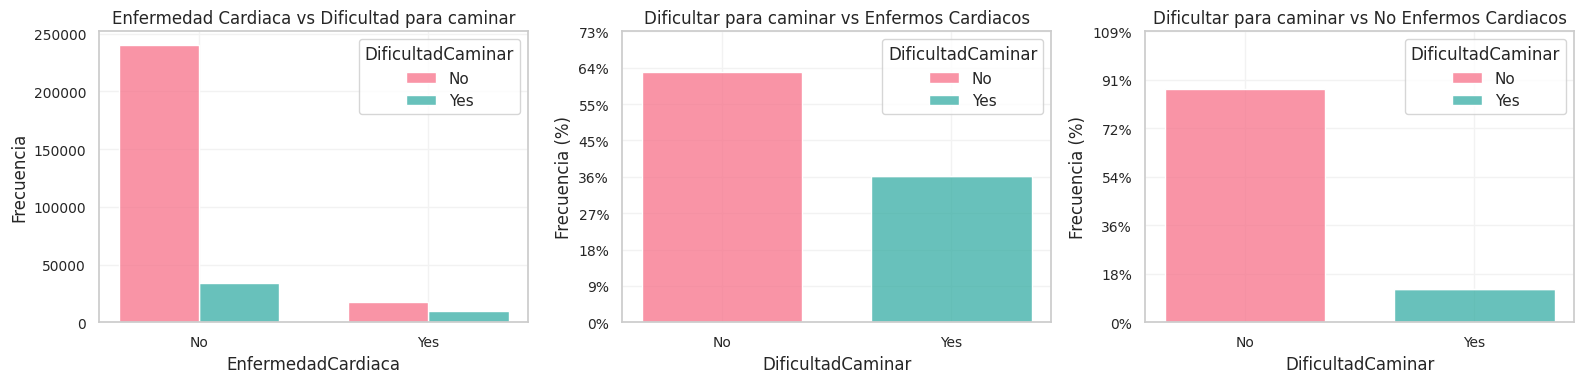

In [ ]:
#se grafica dificultad para caminar vs enfermedad cardiaca
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

sns.histplot(x='EnfermedadCardiaca', data=df_outliers, hue='DificultadCaminar', palette= 'husl', multiple="dodge", shrink= 0.7,  ax=ax[0])
ax[0].set_title("Enfermedad Cardiaca vs Dificultad para caminar")
ax[0].set_ylabel("Frecuencia")

sns.histplot(data=df_outliers[df_outliers['EnfermedadCardiaca'].eq('Yes')].sort_values(by= 'DificultadCaminar', ascending=True), x="DificultadCaminar", multiple='stack',  shrink= 0.7, palette= 'husl', hue='DificultadCaminar', ax=ax[1])
total_samples_3 = len(df_outliers[df_outliers['EnfermedadCardiaca'] == 'Yes'])
ax[1].set_yticks(ax[1].get_yticks())
ax[1].set_yticklabels([f'{int(tick / total_samples_3 * 100)}%' for tick in ax[1].get_yticks()])
ax[1].set_title("Dificultar para caminar vs Enfermos Cardiacos")
ax[1].set_ylabel("Frecuencia (%)")
plt.tight_layout()

sns.histplot(data=df_outliers[df_outliers['EnfermedadCardiaca'].eq('No')].sort_values(by= 'DificultadCaminar', ascending=True), x='DificultadCaminar', multiple='stack', shrink= 0.7, palette= 'husl', hue='DificultadCaminar', ax=ax[2])
total_samples_4 = len(df_outliers[df_outliers['EnfermedadCardiaca'] == 'No'])
ax[2].set_yticks(ax[2].get_yticks())
ax[2].set_yticklabels([f'{int(tick / total_samples_4 * 100)}%' for tick in ax[2].get_yticks()])
ax[2].set_title("Dificultar para caminar vs No Enfermos Cardiacos")
ax[2].set_ylabel("Frecuencia (%)")
plt.tight_layout()


En este caso podemos observar que de las personas que poseen una enfermedad cardíaca derca del 36% presenta dificultad para caminar, ahora de las personas que no presentan enfermedad cardiaca, solo el 15% aproximadamente presenta dificultad para caminar, es decir que en proporción se tiene un mayor porcentaje de personas con dificultad para caminar asociadad con enfermedad cardíaca que sin enfermedad cardíaca.

Text(0, 0.5, 'Frecuencia')

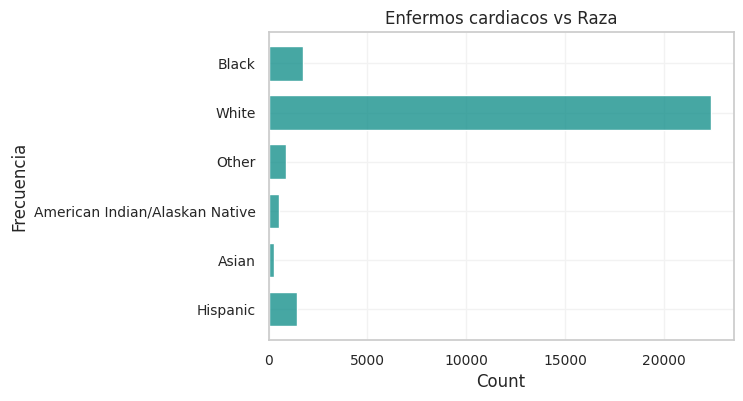

In [ ]:
#se grafica raza vs individuo con enfermedad cardiaca
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.histplot(y='Raza', data=df_outliers[df_outliers['EnfermedadCardiaca'].eq('Yes')], color= '#088A85', multiple="layer", shrink=0.7)
ax.get_yticklabels()
ax.set_title("Enfermos cardiacos vs Raza")
ax.set_ylabel("Frecuencia")

Se puede ver que la mayoría de las personas que presentan una enfermedad cardiaca son de raza blanca, pero esto puede deberse a que del total de encuestados la mayoría de ellos son de raza blanca, por lo que esta tendencia puede ser explicado porque la categoría no se encuentra balanceada. Y que pasa si evaluamos la proporción de enfermos cardíacos por cada raza?

[Text(0.5, 0, 'Proporción de Enfermos Cardiacos'),
 Text(0, 0.5, 'Raza'),
 Text(0.5, 1.0, 'Proporción de Enfermos Cardiacos respecto a No Enfermos vs Raza')]

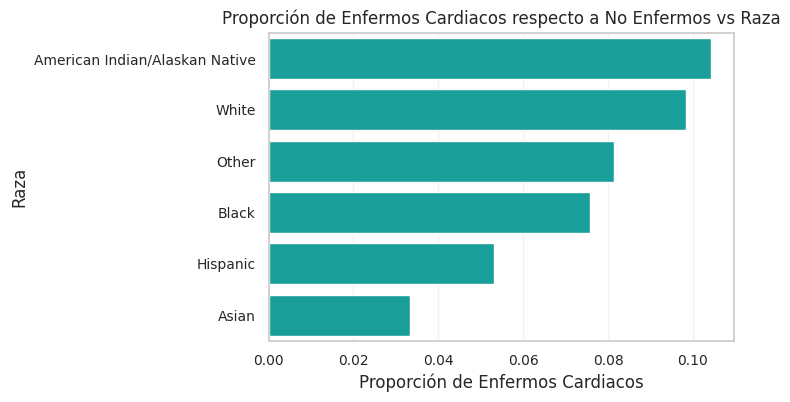

In [ ]:
# Se calcula la proporción de enfermos y no enfermos cardiacos por cada raza
proportion_data = df_outliers.groupby(['Raza', 'EnfermedadCardiaca']).size().unstack()
proportion_data['Proporcion'] = proportion_data['Yes'] / (proportion_data['Yes'] + proportion_data['No'])
proportion_data= proportion_data.sort_values(by= 'Proporcion', ascending= False)

#Gráfico de barras para mostrar la proporción de enfermos cardiacos respecto a no enfermos por raza
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=proportion_data['Proporcion'], y=proportion_data.index, data=proportion_data, color='#04B4AE', dodge=False)
ax.set(xlabel="Proporción de Enfermos Cardiacos", ylabel="Raza", title="Proporción de Enfermos Cardiacos respecto a No Enfermos vs Raza")


Acá podemos ver que los resultados son diferentes, ya que los amerindios son los que presentan mayor proporción de casos de enfermedad cardíaca, y que los de raza blanca no están muy diferenciados de las demás razas.

Es probable que auqellas personas que presenten una enfermedad cardiaca consideren que su estado de salud general no sea bueno, veamos que dicen nuestros datos.

In [ ]:
#se crea un dataframe que incluye solo aquellas personas que presentan una enfermedad cardíaca
df_con_enf_car=df_outliers[df_outliers['EnfermedadCardiaca'] == 'Yes']

In [ ]:
#se crea un dataframe que incluye solo aquellas personas que no presentan una enfermedad cardíaca
df_sin_enf_car=df_outliers[df_outliers['EnfermedadCardiaca'] == 'No']

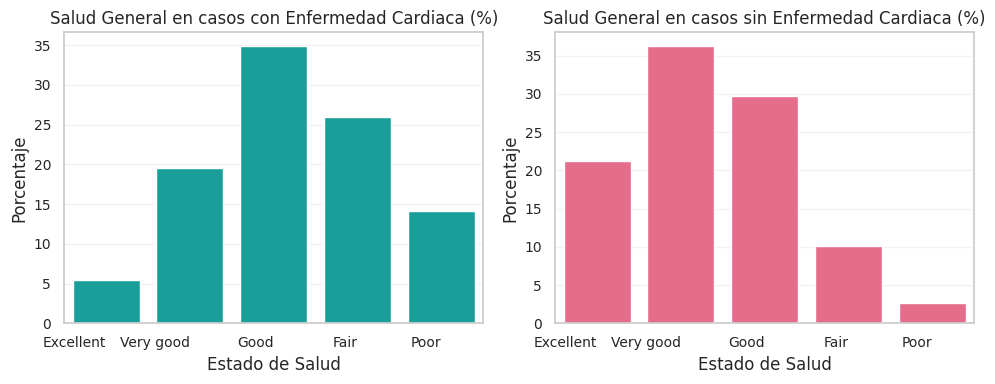

In [ ]:
# Se calcula el porcentaje de cada estado de salud respecto al total de enfermos cardíacos
total_samples = len(df_con_enf_car)
health_state_percentages = df_con_enf_car['SaludGeneral'].value_counts(normalize=True) * 100

# Se calcula el porcentaje de cada estado de salud respecto al total de personas sin enfermedad cardiaca
health_state_percentages_2 = df_sin_enf_car['SaludGeneral'].value_counts(normalize=True) * 100

# Definir el orden de las etiquetas del eje x
health_state_order = ["Excellent", "Very good", "Good", "Fair", "Poor"]

# Se crea el gráfico con los porcentajes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.barplot(x=health_state_percentages.index, y=health_state_percentages.values, order=health_state_order, color='#04B4AE', ax=ax[0])
ax[0].set(title="Salud General en casos con Enfermedad Cardiaca (%)",
          xlabel="Estado de Salud",
          ylabel="Porcentaje")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, ha="right")

sns.barplot(x=health_state_percentages_2.index, y=health_state_percentages_2.values, order=health_state_order, color='#FA5882', ax=ax[1])
ax[1].set(title="Salud General en casos sin Enfermedad Cardiaca (%)",
          xlabel="Estado de Salud",
          ylabel="Porcentaje")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0, ha="right")
plt.tight_layout()
plt.show()

A diferencia de las expectativas, la mayoría de las personas con enfermedad cardíaca perciben su estado de salud como bueno o justo. Aunque no se autocalifican con un estado de salud excelente o muy bueno, apenas un pequeño porcentaje considera que su salud es pobre. Esto sugiere que, a pesar de tener enfermedad cardíaca, muchos individuos no experimentan una percepción completamente negativa de su salud. No obstante, al comparar este grupo con aquellos sin enfermedad cardíaca, se observa una diferencia notable en la distribución. En el primer caso, la curva de percepción de salud tiende a sesgarse hacia la izquierda, mientras que en el segundo caso, la curva se sesga hacia la derecha. En resumen, la mayoría de los pacientes con enfermedad cardíaca tiende a percibir su salud de manera menos positiva en comparación con aquellos sin esta condición.

#5. CODIFICACION DE LAS VARIABLES

Se codifican las variables Diabetes para hacerla binaria, las variable Edad y SaludGeneral, para transformarlas en variables numérica ordinal y la variable objetivo. Además se aplica la técnica del One Hot Encodign para transformar las variables categóricas a numéricas.

In [ ]:
#se parte del dataset con los outliers reemplazados
df_outliers.head()

,EnfermedadCardiaca,IMC,Fumar,ConsumoAlcohol,AccidenteCerebroVascular,SaludFisica,SaludMental,DificultadCaminar,Sexo,Edad,Raza,Diabetes,ActividadFisica,SaludGeneral,HorasSueño,Asma,EnfermedadRenal,CancerDePiel,Es_Outlier_IMC,Es_Outlier_HorasSueño
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0,0
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,0,0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,0,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,0,0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,0,0


In [ ]:
#se binariza la variable diabetes
df_replace_diabetes=df_outliers.replace(('No, borderline diabetes','Yes (during pregnancy)') ,('No', 'Yes'))

In [ ]:
#se codifica la variable edad
df_replace_edad= df_replace_diabetes.replace(('18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))

In [ ]:
#se codifica la variable SaludGeneral
df_replace_saludgeneral= df_replace_edad.replace(('Excellent', 'Very good', 'Good', 'Fair', 'Poor'), (0, 1, 2, 3, 4))

In [ ]:
#se codifica la variable objetivo
df_replace_enfermedadcardiaca= df_replace_saludgeneral.replace(('No', 'Yes'), (0, 1))

In [ ]:
df_replace_enfermedadcardiaca.shape

(301717, 20)

In [ ]:
#se codifican las variables categóricas usando el One Hot Encoder

columnas_a_codificar = ['Fumar', 'ConsumoAlcohol', 'AccidenteCerebroVascular', 'DificultadCaminar', 'Sexo', 'Raza', 'Diabetes', 'ActividadFisica', 'Asma', 'EnfermedadRenal', 'CancerDePiel']
datos_a_codificar = df_replace_enfermedadcardiaca[columnas_a_codificar]
enc = OneHotEncoder()
datos_codificados = enc.fit_transform(datos_a_codificar)
arreglo_codificado = datos_codificados.toarray()
df_codificado = pd.DataFrame(arreglo_codificado, columns=enc.get_feature_names_out(input_features=columnas_a_codificar))
df_codificado.head()

,Fumar_0,Fumar_1,ConsumoAlcohol_0,ConsumoAlcohol_1,AccidenteCerebroVascular_0,AccidenteCerebroVascular_1,DificultadCaminar_0,DificultadCaminar_1,Sexo_Female,Sexo_Male,...,Diabetes_0,Diabetes_1,ActividadFisica_0,ActividadFisica_1,Asma_0,Asma_1,EnfermedadRenal_0,EnfermedadRenal_1,CancerDePiel_0,CancerDePiel_1
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
#se unifican todas las variables (excepto la variable objetivo) en un único dataframe
df_codificado[['IMC','SaludFisica', 'SaludMental','Edad', 'SaludGeneral', 'HorasSueño']] = df_replace_enfermedadcardiaca[['IMC','SaludFisica', 'SaludMental','Edad', 'SaludGeneral', 'HorasSueño']]

In [ ]:
df_codificado.head()

,Fumar_0,Fumar_1,ConsumoAlcohol_0,ConsumoAlcohol_1,AccidenteCerebroVascular_0,AccidenteCerebroVascular_1,DificultadCaminar_0,DificultadCaminar_1,Sexo_Female,Sexo_Male,...,EnfermedadRenal_0,EnfermedadRenal_1,CancerDePiel_0,CancerDePiel_1,IMC,SaludFisica,SaludMental,Edad,SaludGeneral,HorasSueño
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,16.60,3.0,30.0,7,1,5.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,20.34,0.0,0.0,12,1,7.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,26.58,20.0,30.0,9,3,8.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,24.21,0.0,0.0,11,2,6.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,23.71,28.0,0.0,4,1,8.0


In [ ]:
df_codificado.shape

(301717, 32)

#6. GENERACION DE NUEVAS VARIABLES

Se crea una nueva variable llamada Score, que hace una sumatoria de todas las
columnas por cada una de las filas del dataframe, obteniendo un valor, el cual a mayor cantidad de condiciones, mayor es.

In [ ]:
df_codificado['Score']= df_codificado.apply(sum, axis=1)

In [ ]:
df_codificado['Score'].head()

0     73.60
1     51.34
2    107.58
3     54.21
4     75.71
Name: Score, dtype: float64

In [ ]:
df_codificado.head()

,Fumar_0,Fumar_1,ConsumoAlcohol_0,ConsumoAlcohol_1,AccidenteCerebroVascular_0,AccidenteCerebroVascular_1,DificultadCaminar_0,DificultadCaminar_1,Sexo_Female,Sexo_Male,...,EnfermedadRenal_1,CancerDePiel_0,CancerDePiel_1,IMC,SaludFisica,SaludMental,Edad,SaludGeneral,HorasSueño,Score
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,16.60,3.0,30.0,7,1,5.0,73.60
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,20.34,0.0,0.0,12,1,7.0,51.34
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,26.58,20.0,30.0,9,3,8.0,107.58
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,24.21,0.0,0.0,11,2,6.0,54.21
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,23.71,28.0,0.0,4,1,8.0,75.71


In [ ]:
df_codificado.shape

(301717, 33)

Text(0, 0.5, 'Puntuación (Score)')

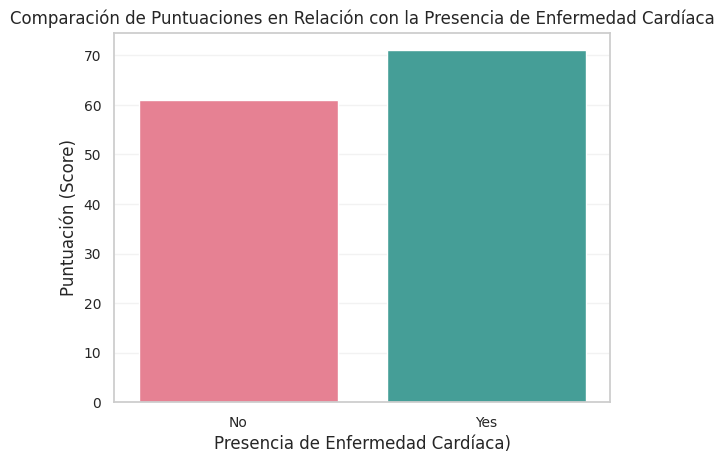

In [ ]:
sns.barplot(x=df_outliers['EnfermedadCardiaca'], y= df_codificado['Score'], palette= 'husl', errorbar=None)
# Título y nombres de ejes
plt.title('Comparación de Puntuaciones en Relación con la Presencia de Enfermedad Cardíaca')
plt.xlabel('Presencia de Enfermedad Cardíaca)')
plt.ylabel('Puntuación (Score)')

Se puede observar que este valor de Score en promedio es mayor en los individuos que padecen una Enfermedad Cardiaca que en aquellos que no la padecen.

#7. SELECCION DE VARIABLES

In [ ]:
#se seleccionan las variables de interes con el metodo VarianceThreshold de sklearn, utilizando un umbral de 90%
sel = VarianceThreshold(threshold=(.90 * (1 - .90)))
datos_seleccionados= sel.fit_transform(df_codificado)
datos_seleccionados.shape

(301717, 20)

In [ ]:
#se contruye un dataframe con las características seleccionadas
mascara_seleccion = sel.get_support()
caracteristicas_seleccionadas = [df_codificado.columns[i] for i, seleccionada in enumerate(mascara_seleccion) if seleccionada]
print("Características seleccionadas:", caracteristicas_seleccionadas)
df_x=df_codificado[caracteristicas_seleccionadas]
df_x

Características seleccionadas: ['Fumar_0', 'Fumar_1', 'DificultadCaminar_0', 'DificultadCaminar_1', 'Sexo_Female', 'Sexo_Male', 'Raza_White', 'Diabetes_0', 'Diabetes_1', 'ActividadFisica_0', 'ActividadFisica_1', 'Asma_0', 'Asma_1', 'IMC', 'SaludFisica', 'SaludMental', 'Edad', 'SaludGeneral', 'HorasSueño', 'Score']


,Fumar_0,Fumar_1,DificultadCaminar_0,DificultadCaminar_1,Sexo_Female,Sexo_Male,Raza_White,Diabetes_0,Diabetes_1,ActividadFisica_0,ActividadFisica_1,Asma_0,Asma_1,IMC,SaludFisica,SaludMental,Edad,SaludGeneral,HorasSueño,Score
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,16.60,3.0,30.0,7,1,5.000000,73.600000
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,20.34,0.0,0.0,12,1,7.000000,51.340000
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,26.58,20.0,30.0,9,3,8.000000,107.580000
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,24.21,0.0,0.0,11,2,6.000000,54.210000
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,23.71,28.0,0.0,4,1,8.000000,75.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301712,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,27.41,7.0,0.0,8,3,6.000000,62.410000
301713,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,29.84,0.0,0.0,3,1,5.000000,49.840000
301714,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,24.24,0.0,0.0,5,2,6.000000,48.240000
301715,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,32.81,0.0,0.0,1,2,6.690511,53.500511


Se utilizó el método VarianceThreshold de sklearn, utilizando un umbral de 90%, para seleccionar las variables de interés, como podemos ver el método seleccionó variables que se correlacionan con lo visto durante el análisis exploratorio de los datos, en la mayor parte de los casos.

#8. ELECCION DE MODELOS DE CLASIFICACION

##8.1 DEFINICION DE X E Y

In [ ]:
#se define el x (variables seleccionadas)
X = df_x

In [ ]:
#se define el y (la variable objetivo)
y = df_replace_enfermedadcardiaca['EnfermedadCardiaca']

##8.2 BALANCEO DEL DATASET

In [ ]:
!pip install imbalanced-learn

In [ ]:
# Calcular el número de instancias de cada clase
clase_0_count = np.sum(y == 0)
clase_1_count = np.sum(y == 1)

# Calcular el total de instancias
total_instancias = len(y)

# Calcular el porcentaje de cada clase
porcentaje_clase_0 = round((clase_0_count / total_instancias) * 100)
porcentaje_clase_1 = round((clase_1_count / total_instancias) * 100)

print(f'Porcentaje de la clase 0: {porcentaje_clase_0}%')
print(f'Porcentaje de la clase 1: {porcentaje_clase_1}%')

Porcentaje de la clase 0: 91%
Porcentaje de la clase 1: 9%


Como se puede notar, existe un desequilibrio significativo entre las clases, con una proporción de 9 a 1 entre la clase mayoritaria y la clase minoritaria. Ante esta disparidad, se opta por aplicar el método de SMOTE (Synthetic Minority Over-sampling Technique) para abordar este problema. SMOTE se encarga de generar de manera aleatoria muestras sintéticas para la clase minoritaria, lo que equilibra la distribución de clases y permite un entrenamiento más efectivo de modelos de aprendizaje automático en situaciones desequilibradas

In [ ]:
#se utiliza el método SMOTE para balancear los datos

#se mprime la forma original del conjunto de datos de clases
print('Forma original del conjunto de datos %s' % Counter(y))

#se crea una instancia de SMOTE con una semilla aleatoria
sm = SMOTE(random_state=0)

#se aplica el método SMOTE para generar muestras sintéticas y balancear el conjunto de datos
X_res, y_res = sm.fit_resample(X, y)

#se imprime la forma del conjunto de datos balanceado después de aplicar SMOTE
print('Forma del conjunto de datos balanceado %s' % Counter(y_res))

Forma original del conjunto de datos Counter({0: 274456, 1: 27261})
Forma del conjunto de datos balanceado Counter({0: 274456, 1: 274456})


##8.3 DEFINICION DE TRAIN Y TEST

In [ ]:
#se separan los datos en entrenamiento/test en razón 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2, random_state=0)

El problema planteado se trata de un problema de aprendizaje supervisado de clasificación, en donde se tiene una variable objetivo que puede tomar dos valores, está enfermo (1) o no está enfermo (0). Por ello se seleccionaran algoritmos de clasificación como ser: Regresion logistica, Random forest, KNN, etc.

##8.4 MODELO RANDOM FOREST

In [ ]:
#se prueba el modelo random forest modelo_random_forest
modelo_random_forest= RandomForestClassifier(random_state=0)
modelo_random_forest.fit(X_train, y_train)
predichos_random_forest = modelo_random_forest.predict(X_test)

##8.5 MODELO REGRESION LOGISTICA

In [ ]:
#se prueba el modelo regresión logística
modelo_regresion_logistica= LogisticRegression(random_state=0, max_iter=1000)
modelo_regresion_logistica.fit(X_train, y_train)
predichos_regresion_logistica = modelo_regresion_logistica.predict(X_test)

##8.6 MODELO KNN

In [ ]:
#se prueba el modelo KNN
modelo_KNN= KNeighborsClassifier()
modelo_KNN.fit(X_train, y_train)
predichos_KNN = modelo_KNN.predict(X_test)

#9. EVALUACION DE MODELOS

Para evaluar el desempeño del modelo se utilizan métricas adecuadas para evaluar problemas de clasificación, como ser: recall, precisionl, accuracy, valor F1, matriz de confusión.

##9.1 MODELO RANDOM FOREST

In [ ]:
print(metrics.classification_report(y_test, predichos_random_forest))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     54756
           1       0.94      0.91      0.93     55027

    accuracy                           0.93    109783
   macro avg       0.93      0.93      0.93    109783
weighted avg       0.93      0.93      0.93    109783



In [ ]:
print(metrics.confusion_matrix(y_test, predichos_random_forest))

[[51758  2998]
 [ 5029 49998]]


**Precision (Precisión):**

Para la clase 0 (etiqueta 0), la precisión es del 91%. Esto significa que el 91% de las predicciones hechas por el modelo como clase 0 son realmente correctas.

Para la clase 1 (etiqueta 1), la precisión es del 94%. Esto significa que solo el 94% de las predicciones hechas por el modelo como clase 1 son realmente correctas.

**Recall (Recuperación o Sensibilidad):**

Para la clase 0 (etiqueta 0), el recall es del 95%. Esto significa que el 95% de las instancias reales de la clase 0 fueron correctamente identificadas por el modelo.

Para la clase 1 (etiqueta 1), el recall es del 91%. Esto significa que solo el 91% de las instancias reales de la clase 1 fueron correctamente identificadas por el modelo.

**F1-Score:**

Para la clase 0, el F1-score es del 0.93, lo que indica un buen equilibrio entre precisión y recall.

Para la clase 1, el F1-score es del 0.93, lo que indica un desequilibrio entre precisión y recall.

**Accuracy (Exactitud):**

La precisión global del modelo alcanza un notable 93%, lo que refleja el porcentaje de predicciones correctas en el conjunto de prueba en su totalidad.
En resumen, este modelo parece tener un rendimiento bastante bueno en términos de precisión, recall y F1-Score tanto para la clase 0 como para la clase 1. La alta precisión y recall indican que el modelo es efectivo para predecir ambas clases en el conjunto de datos.

##9.2 MODELO REGRESION LOGISTICA

In [ ]:
print(metrics.classification_report(y_test, predichos_regresion_logistica))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     54756
           1       0.86      0.81      0.83     55027

    accuracy                           0.84    109783
   macro avg       0.84      0.84      0.84    109783
weighted avg       0.84      0.84      0.84    109783



In [ ]:
print(metrics.confusion_matrix(y_test, predichos_regresion_logistica))

[[47322  7434]
 [10441 44586]]


**Precision (Precisión):**

Para la clase 0 (etiqueta 0), la precisión es del 82%. Esto significa que el 82% de las predicciones hechas por el modelo como clase 0 son realmente correctas.

Para la clase 1 (etiqueta 1), la precisión es del 86%. Esto significa que solo el 86% de las predicciones hechas por el modelo como clase 1 son realmente correctas.

**Recall (Recuperación o Sensibilidad):**

Para la clase 0 (etiqueta 0), el recall es del 86%. Esto significa que el 86% de las instancias reales de la clase 0 fueron correctamente identificadas por el modelo.

Para la clase 1 (etiqueta 1), el recall es del 81%. Esto significa que solo el 81% de las instancias reales de la clase 1 fueron correctamente identificadas por el modelo.

**F1-Score:**

Para la clase 0, el F1-score es del 0.84, lo que indica un buen equilibrio entre precisión y recall.

Para la clase 1, el F1-score es del 0.83, lo que indica un desequilibrio entre precisión y recall.

**Accuracy (Exactitud):**

La precisión global del modelo alcanza un notable 84%, lo que refleja el porcentaje de predicciones correctas en el conjunto de prueba en su totalidad.
En resumen, este segundo modelo también tiene un rendimiento razonable, pero las métricas son ligeramente más bajas en comparación con el primer modelo.

##9.3 MODELO KNN

In [ ]:
print(metrics.classification_report(y_test, predichos_KNN))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84     54756
           1       0.80      0.97      0.87     55027

    accuracy                           0.86    109783
   macro avg       0.88      0.86      0.86    109783
weighted avg       0.88      0.86      0.86    109783



In [ ]:
print(metrics.confusion_matrix(y_test, predichos_KNN))

[[41220 13536]
 [ 1848 53179]]


**Precision (Precisión):**

Para la clase 0 (etiqueta 0), la precisión es del 96%. Esto significa que el 96% de las predicciones hechas por el modelo como clase 0 son realmente correctas.

Para la clase 1 (etiqueta 1), la precisión es del 80%. Esto significa que solo el 80% de las predicciones hechas por el modelo como clase 1 son realmente correctas.

**Recall (Recuperación o Sensibilidad):**

Para la clase 0 (etiqueta 0), el recall es del 75%. Esto significa que el 75% de las instancias reales de la clase 0 fueron correctamente identificadas por el modelo.

Para la clase 1 (etiqueta 1), el recall es del 97%. Esto significa que solo el 97% de las instancias reales de la clase 1 fueron correctamente identificadas por el modelo.

**F1-Score:**

Para la clase 0, el F1-score es del 0.84, lo que indica un buen equilibrio entre precisión y recall.

Para la clase 1, el F1-score es del 0.87, lo que indica un desequilibrio entre precisión y recall.

**Accuracy (Exactitud):**

La precisión global del modelo alcanza un notable 86%, lo que refleja el porcentaje de predicciones correctas en el conjunto de prueba en su totalidad.
En resumen, este modelo también tiene un rendimiento razonable, pero las métricas son ligeramente más bajas en comparación con el primer modelo.  

#10. CONCLUSION

En resumen, este informe demuestra que el proceso de balanceo de datos fue efectivo, permitiendo que todos los modelos tuvieran cierto grado de éxito en la identificación de la clase minoritaria. Sin embargo, se destaca el modelo de Random Forest, ya que mostró un rendimiento sobresaliente, con tasas de predicción superiores al 90% en todos los casos. Esto significa que el modelo Random Forest logra identificar de manera precisa tanto la clase positiva como la clase negativa, lo que lo posiciona como la opción más sólida y confiable entre los modelos evaluados. El próximo paso sería optimizar el modelo seleccionado.